# About the Data

The dataset is the Average temperature of New York City from 1870-1916. The Dataset is taken from National Oceanic and Atmospheric Administration (NOAA).

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller, acf, pacf

%matplotlib inline

In [32]:
df = pd.read_csv('NewYorkTemperature.csv')

In [33]:
df.shape

(147, 2)

In [34]:
df.head()

,DATE,TAVG
0,1870,53.8
1,1871,51.3
2,1872,51.3
3,1873,50.9
4,1874,51.3


In [35]:
df.dtypes

DATE      int64
TAVG    float64
dtype: object

In [36]:
df.DATE = pd.to_datetime(df.DATE, format='%Y')
df = df.set_index(df.DATE)

In [37]:
df.head()

,DATE,TAVG
DATE,,
1870-01-01,1870-01-01,53.8
1871-01-01,1871-01-01,51.3
1872-01-01,1872-01-01,51.3
1873-01-01,1873-01-01,50.9
1874-01-01,1874-01-01,51.3


In [38]:
df.drop('DATE', axis = 1, inplace=True)

In [39]:
df.head()

,TAVG
DATE,
1870-01-01,53.8
1871-01-01,51.3
1872-01-01,51.3
1873-01-01,50.9
1874-01-01,51.3


# 1. Plot the time series 

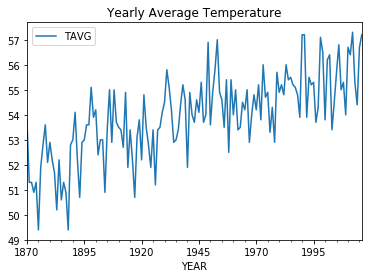

In [40]:
df.plot()
plt.title('Yearly Average Temperature')
plt.xlabel('YEAR')
plt.show()

In [41]:
result = adfuller(df.TAVG)
print("The p-value for the ADF test is ", result[1])

The p-value for the ADF test is  0.583293898787


The data seems to be non stationary.


# 2. Make data set stationary by differencing.

In [42]:
#To take first differences, 
df['diff_1'] = df.TAVG- df.TAVG.shift(1)

In [43]:
df.head()

,TAVG,diff_1
DATE,,
1870-01-01,53.8,NaN
1871-01-01,51.3,-2.5
1872-01-01,51.3,0.0
1873-01-01,50.9,-0.4
1874-01-01,51.3,0.4


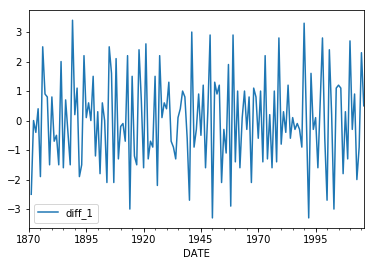

In [44]:
df.plot(y='diff_1')
plt.show()

In [45]:
# differenced data
x_diff = df['diff_1'].iloc[1:]
result = adfuller(x_diff)
print('\nDifferenced Data:')
print('ADF Statistic %f' % result[0])
print('p-value: %f' % result[1])


Differenced Data:
ADF Statistic -8.540297
p-value: 0.000000


This confirms the time series data to be stationary now.

# 3. Generate and Interpret an autocorrelation function (ACF) and PACF.

In [46]:
x_acf = pd.DataFrame(acf(x_diff))
x_pacf = pd.DataFrame(pacf(x_diff))

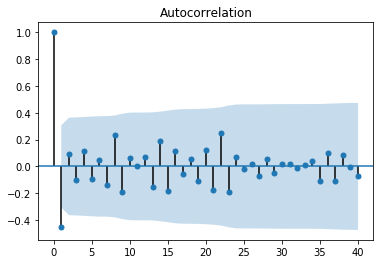

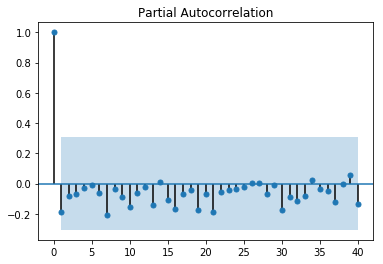

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(x_acf, lags=40)

plot_pacf(x_pacf, lags=40)


plt.show()

There is no clear pattern in the ACF and PACF except the negative lag-1 autocorrelation in the ACF.

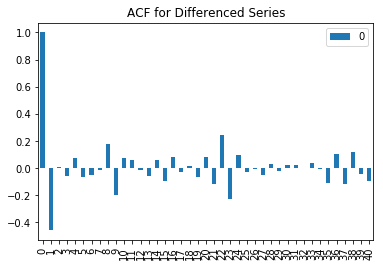

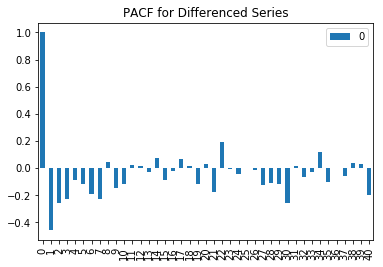

In [48]:
x_acf.plot(kind='bar')
plt.title('ACF for Differenced Series')
plt.show()

x_pacf.plot(kind='bar')
plt.title('PACF for Differenced Series')
plt.show()

# 4. Generate 5 ARIMA specifications (p, d, q) and evaluate their efficacy at modeling the data.

In [19]:
from statsmodels.tsa.arima_model import ARIMA

In [20]:
df.isnull().sum()

TAVG      0
diff_1    1
dtype: int64

In [64]:
df = df.dropna()

# 4.1
AR and MA of order 1 and first order difference

In [49]:
model_111 = ARIMA(df.TAVG, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                 D.TAVG   No. Observations:                  146
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -230.536
Method:                       css-mle   S.D. of innovations              1.155
Date:                Thu, 12 Jul 2018   AIC                            469.073
Time:                        14:26:46   BIC                            481.007
Sample:                    01-01-1871   HQIC                           473.922
                         - 01-01-2016                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0280      0.003     10.918      0.000       0.023       0.033
ar.L1.D.TAVG     0.1272      0.083      1.527      0.129      -0.036       0.291
ma.L1.D.TAVG    -1.0000      0.023    -43.96

# 4.2
MA of order 1 and first order difference

In [50]:
model_011 = ARIMA(df.TAVG, order=(0,1,1))
model_011_fit = model_011.fit()
print(model_011_fit.summary())
print('Residuals Description')
print(model_011_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                 D.TAVG   No. Observations:                  146
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -231.695
Method:                       css-mle   S.D. of innovations              1.163
Date:                Thu, 12 Jul 2018   AIC                            469.391
Time:                        14:26:51   BIC                            478.342
Sample:                    01-01-1871   HQIC                           473.028
                         - 01-01-2016                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0280      0.002     12.398      0.000       0.024       0.032
ma.L1.D.TAVG    -0.9999      0.027    -37.060      0.000      -1.053      -0.947
                                    Roots   

# 4.3
AR of order 2 , MA of order 1 and first order difference

In [51]:
model_211 = ARIMA(df.TAVG, order=(2,1,1))
model_211_fit = model_211.fit()
print(model_211_fit.summary())
print('Residuals Description')
print(model_211_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                 D.TAVG   No. Observations:                  146
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -230.348
Method:                       css-mle   S.D. of innovations              1.154
Date:                Thu, 12 Jul 2018   AIC                            470.697
Time:                        14:27:00   BIC                            485.615
Sample:                    01-01-1871   HQIC                           476.758
                         - 01-01-2016                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0280      0.003     10.389      0.000       0.023       0.033
ar.L1.D.TAVG     0.1214      0.084      1.448      0.150      -0.043       0.286
ar.L2.D.TAVG     0.0514      0.084      0.61

# 4.4
AR of order 3, MA of order 1 and first order difference

In [53]:
model_311 = ARIMA(df.TAVG, order=(3,1,1))
model_311_fit = model_311.fit()
print(model_311_fit.summary())
print('Residuals Description')
print(model_311_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                 D.TAVG   No. Observations:                  146
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -230.334
Method:                       css-mle   S.D. of innovations              1.153
Date:                Thu, 12 Jul 2018   AIC                            472.668
Time:                        14:27:34   BIC                            490.569
Sample:                    01-01-1871   HQIC                           479.942
                         - 01-01-2016                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0280      0.003     10.532      0.000       0.023       0.033
ar.L1.D.TAVG     0.1221      0.084      1.455      0.148      -0.042       0.287
ar.L2.D.TAVG     0.0530      0.084      0.62

C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# 4.5
AR of order 4, MA of order 1 and first order difference

In [54]:
model_411 = ARIMA(df.TAVG, order=(4,1,1))
model_411_fit = model_411.fit()
print(model_411_fit.summary())
print('Residuals Description')
print(model_411_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                 D.TAVG   No. Observations:                  146
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -230.251
Method:                       css-mle   S.D. of innovations              1.153
Date:                Thu, 12 Jul 2018   AIC                            474.502
Time:                        14:28:21   BIC                            495.388
Sample:                    01-01-1871   HQIC                           482.989
                         - 01-01-2016                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0280      0.003     10.202      0.000       0.023       0.033
ar.L1.D.TAVG     0.1226      0.084      1.461      0.146      -0.042       0.287
ar.L2.D.TAVG     0.0511      0.084      0.60

C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [55]:
comp = pd.DataFrame(
    {'Model' : ['model_111','model_011', 'model_211', 'model_311', 'model_411'],
     'AIC' : [model_111_fit.aic, model_011_fit.aic, model_211_fit.aic, model_311_fit.aic, model_411_fit.aic],
     'BIC' : [model_111_fit.bic, model_011_fit.bic, model_211_fit.bic, model_311_fit.bic, model_411_fit.bic]
    }
     )

In [56]:
comp.sort_values(by= ['AIC', 'BIC'], ascending = [True, True])

,AIC,BIC,Model
0,469.072911,481.007338,model_111
1,469.390974,478.341794,model_011
2,470.696710,485.614743,model_211
3,472.667790,490.569430,model_311
4,474.502377,495.387624,model_411


Best model = AR and MA of  order 1 with first order difference.

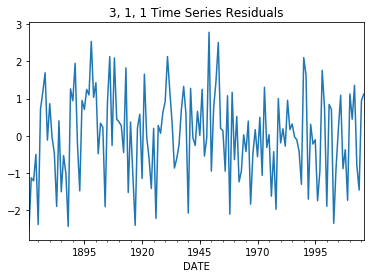

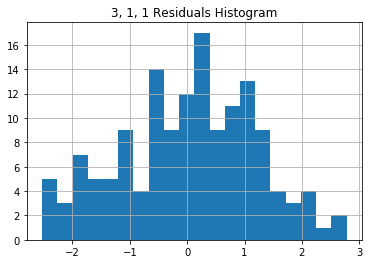

In [57]:
residuals_111 = pd.DataFrame(model_111_fit.resid)
residuals_111.plot(legend=False)
plt.title('3, 1, 1 Time Series Residuals')

residuals_111.hist(bins=20)
plt.title('3, 1, 1 Residuals Histogram')

plt.show()

# 5. Chose best specification and make the case for it as the logical model.¶

In [58]:
import numpy as np

AIC111 =  model_111_fit.aic
AIC211 =  model_211_fit.aic
AIC311 =  model_311_fit.aic
AIC411 =  model_411_fit.aic

loss_211 = np.exp((AIC111 - AIC211) / 2)
print(loss_211)

loss_311 = np.exp((AIC111 - AIC311) / 2)
print(loss_311)

loss_411 = np.exp((AIC111 - AIC411) / 2)
print(loss_411)



0.444014020369
0.165722714773
0.0662226364128


# Conclusion
AR and MA of order 1 with first order difference , ARIMA(1,1,1) is the Best model for this dataset.